In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("gene_expression.csv")
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<Axes: xlabel='Gene One', ylabel='Gene Two'>

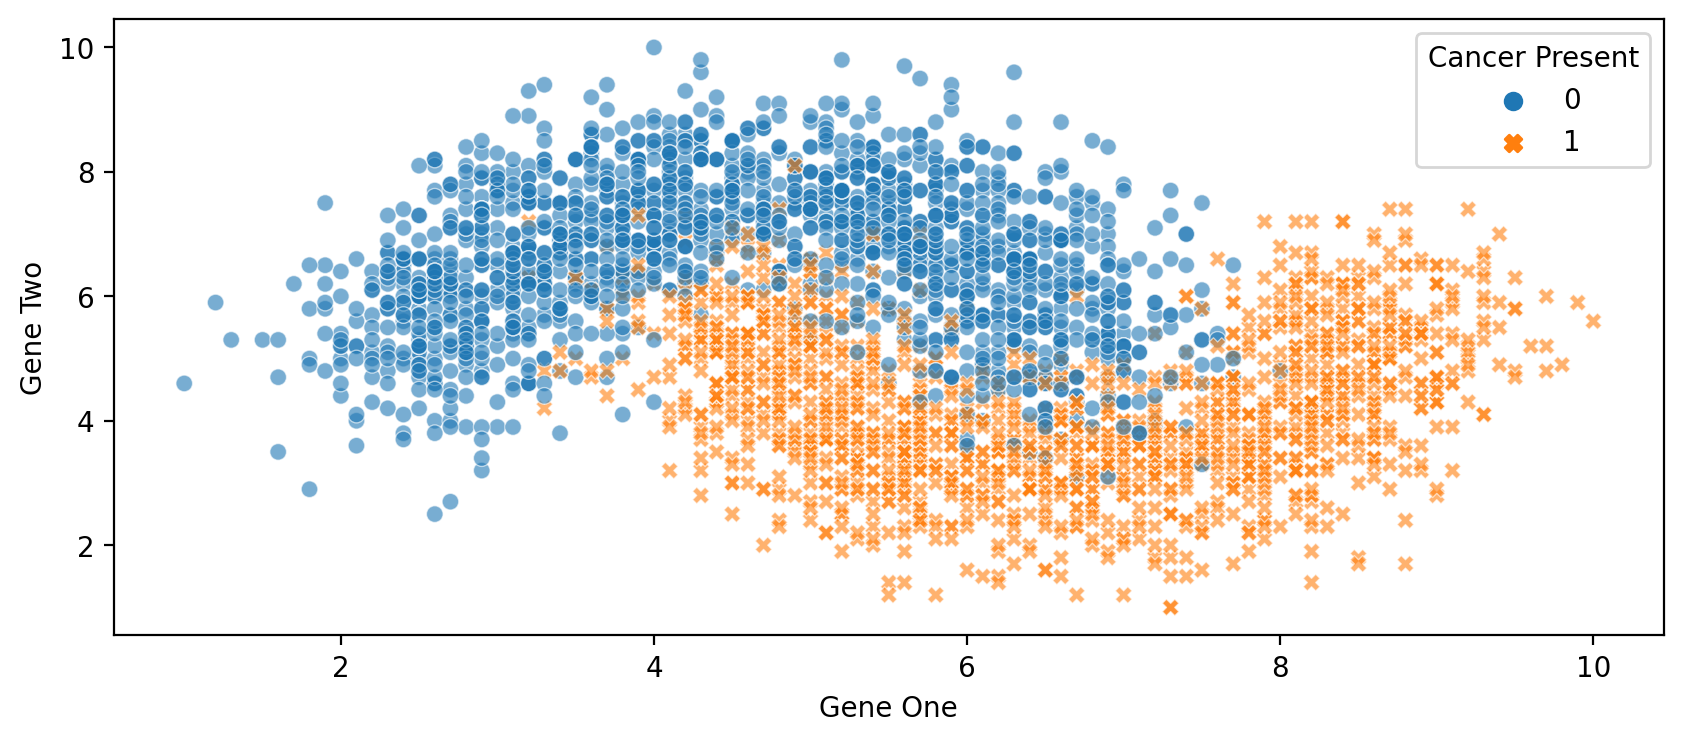

In [3]:
plt.figure(figsize = (10, 4), dpi =200 )
sns.scatterplot(data =df, x = "Gene One", y = "Gene Two", hue = "Cancer Present"
               , alpha = 0.6, style = "Cancer Present")

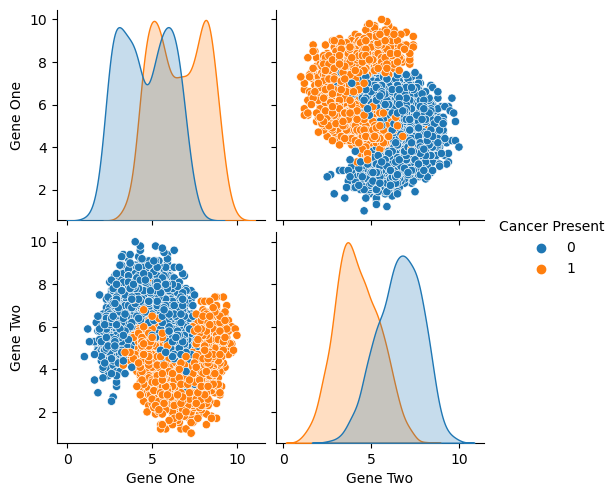

In [4]:
sns.pairplot(data = df, hue = 'Cancer Present')

In [5]:
X = df.drop('Cancer Present', axis =1)
y = df['Cancer Present']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
X_train_scaled = scaler.fit_transform(X_train)

In [11]:
X_test_scaled = scaler.transform(X_test)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn_model = KNeighborsClassifier(n_neighbors = 1)

In [14]:
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
y_pred = knn_model.predict(X_test_scaled)

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

In [17]:
confusion_matrix(y_test, y_pred)

array([[382,  41],
       [ 34, 443]], dtype=int64)

In [18]:
len(y_test)

900

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       423
           1       0.92      0.93      0.92       477

    accuracy                           0.92       900
   macro avg       0.92      0.92      0.92       900
weighted avg       0.92      0.92      0.92       900



In [20]:
df["Cancer Present"].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64